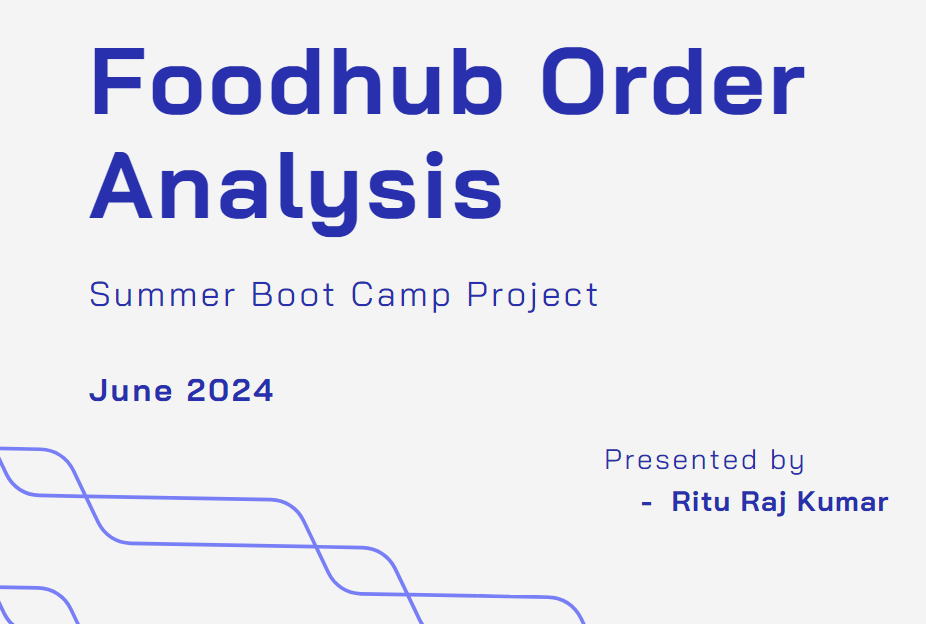

# **Index**

# **List Of Tables**

# **List Of Figures**

# **Problem Statement/Objective**
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## **Data Description**
The data contains the different data related to a food order. The detailed data dictionary is given below.

Data Dictionary

•	order_id: Unique ID of the order

•	customer_id: ID of the customer who ordered the food

•	restaurant_name: Name of the restaurant

•	cuisine_type: Cuisine ordered by the customer

•	cost: Cost of the order

•	day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

•	rating: Rating given by the customer out of 5

•	food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

•	delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


## Basic Things

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [ ]:
# Load the dataset
df = pd.read_csv('2-foodhub_order_New.csv')


###1. Display the First 5 Rows

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


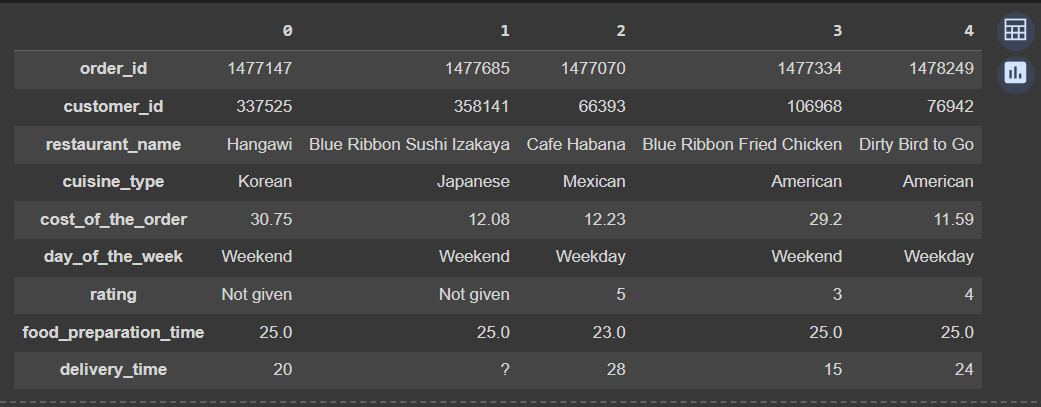

Observations -
Rating - Not Given
dilvery time - (?)

### 2. Display the Last 5 Rows

In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


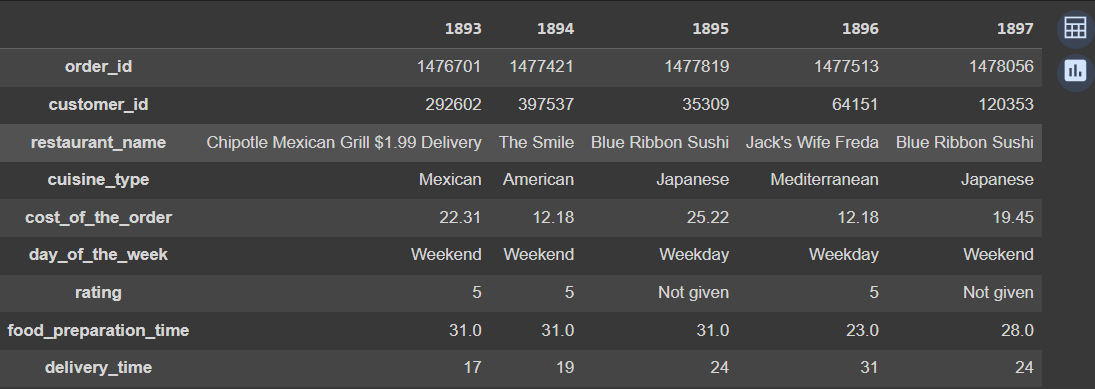

Observation -
Resturant name has $

### 3. Check the Shape of the Dataset:

In [ ]:
df.shape

(1898, 9)

### 4. Check the Data Types of Each Feature:

In [ ]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object

### 5. Check the Statistical summary

In [ ]:
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1895,1898.000000,1898,1898,1896.000000,1898
unique,NaN,NaN,178,14,NaN,2,4,NaN,20
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,24
freq,NaN,NaN,219,582,NaN,1351,736,NaN,161
mean,1.477496e+06,171168.478398,NaN,NaN,80.722007,NaN,NaN,27.371835,NaN
std,5.480497e+02,113698.139743,NaN,NaN,2798.141333,NaN,NaN,4.634211,NaN
min,1.476547e+06,1311.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,NaN
50%,1.477496e+06,128600.000000,NaN,NaN,14.160000,NaN,NaN,27.000000,NaN
75%,1.477970e+06,270525.000000,NaN,NaN,22.310000,NaN,NaN,31.000000,NaN


Observation - Issuee in delivery_time, cost_of_the_order - Holds a outlier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### Observation
Rating - Object
* delivery - (it should be int)
* time - object (it should be int)

### 6. Check the null values

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

### 7. Check the duplicate values

In [ ]:
df.duplicated().sum()

0

### 8. Check the anomalies or wrong entries.

In [ ]:
df['day_of_the_week'].unique()
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

### 9. Check the outliers and their authenticity.

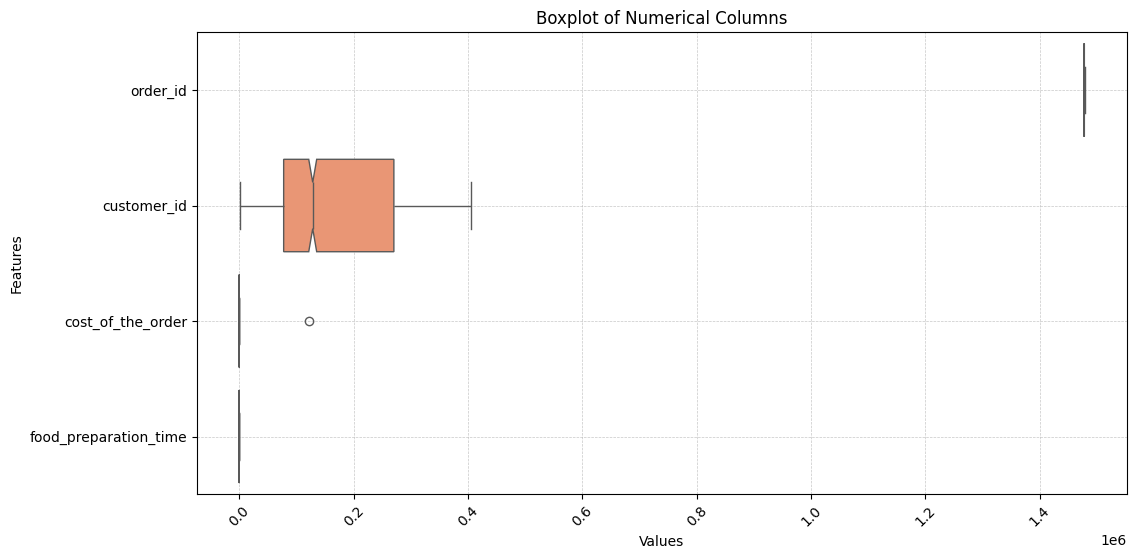

Outliers detected using IQR method:
order_id                 0
customer_id              0
cost_of_the_order        1
food_preparation_time    0
dtype: int64


In [ ]:
def detect_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers_iqr = df[numerical_columns].apply(detect_iqr)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numerical_columns], orient='h', notch=True, palette='Set2')

# Add title and labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Display the outliers found using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())

### 10. Data Cleaning

In [ ]:
df.duplicated().sum()
df[df.duplicated()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


Invalid values

In [ ]:
# we will check only for
df['delivery_time'].unique()
df['delivery_time'].value_counts()
df[df['delivery_time']=='?']
df['delivery_time']= df['delivery_time'].replace('?',np.nan)
df[df['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


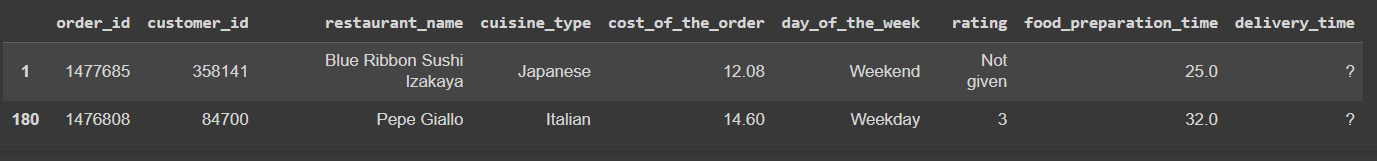

Values - Corrected

MISSING VAlUES

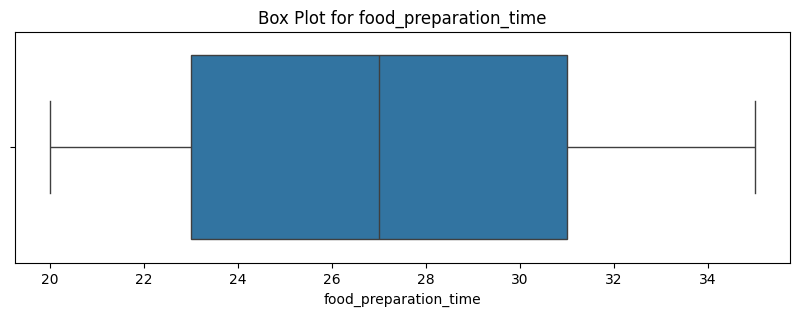

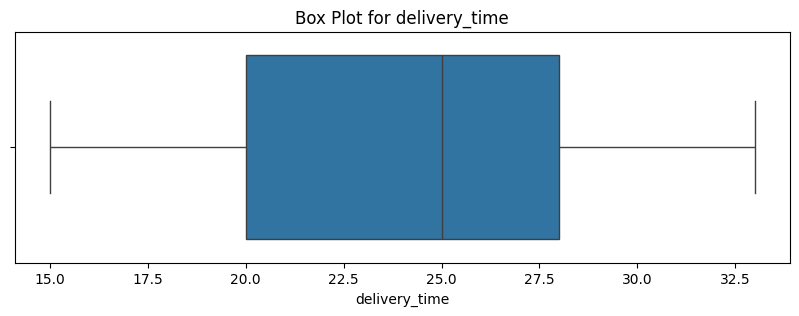

count    1898.000000
mean       16.505809
std         7.507834
min         0.000000
25%        12.080000
50%        14.160000
75%        22.310000
max        37.655000
Name: cost_of_the_order, dtype: float64


In [ ]:
# Check for rows with any missing values
missing_rows = df[df.isnull().sum(axis=1) > 0]

# Summarize the number of missing values per column
missing_values_per_column = df.isnull().sum()

# Calculate the percentage of missing values per column
missing_values_percentage = df.isnull().sum() / len(df) * 100

# Convert 'delivery_time' to float
df['delivery_time'] = df['delivery_time'].astype('float')

# Plot box plots for 'food_preparation_time' and 'delivery_time'
for column in ['food_preparation_time', 'delivery_time']:
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

# Define the function to calculate lower and upper bounds for outlier removal
def calculate_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

# Calculate lower and upper bounds for 'cost_of_the_order'
lower_bound, upper_bound = calculate_bounds(df['cost_of_the_order'])

# Identify outliers in 'cost_of_the_order'
outliers_upper = df[df['cost_of_the_order'] > upper_bound]
outliers_lower = df[df['cost_of_the_order'] < lower_bound]

# Replace outliers in 'cost_of_the_order' with bounds
df['cost_of_the_order'] = np.where(df['cost_of_the_order'] > upper_bound, upper_bound, df['cost_of_the_order'])
df['cost_of_the_order'] = np.where(df['cost_of_the_order'] < lower_bound, lower_bound, df['cost_of_the_order'])

# Verify the changes
print(df['cost_of_the_order'].describe())

# Fill missing values for 'cuisine_type' with the mode
mode_cuisine = df['cuisine_type'].mode().values[0]
df['cuisine_type'] = df['cuisine_type'].replace(np.nan, mode_cuisine)

# Fill missing values for 'food_preparation_time' and 'delivery_time' with the mean
mean_food_preparation_time = df['food_preparation_time'].mean()
mean_delivery_time = df['delivery_time'].mean()

df['food_preparation_time'].fillna(mean_food_preparation_time, inplace=True)
df['delivery_time'].fillna(mean_delivery_time, inplace=True)


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.505809,27.371835,24.162447
std,5.480497e+02,113698.139743,7.507834,4.631768,4.972564
min,1.476547e+06,1311.000000,0.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000,28.000000
max,1.478444e+06,405334.000000,37.655000,35.000000,33.000000


# ***Main***

# **1.	Order Analysis**

### • Total number of orders in the dataset



In [ ]:
total_orders = df['order_id'].nunique()
print(f'Total number of orders: {total_orders}')

df.shape

Total number of orders: 1898


(1898, 9)

Total number of orders placed: 1898

### • The average cost of an order

Average cost of an order: $16.51


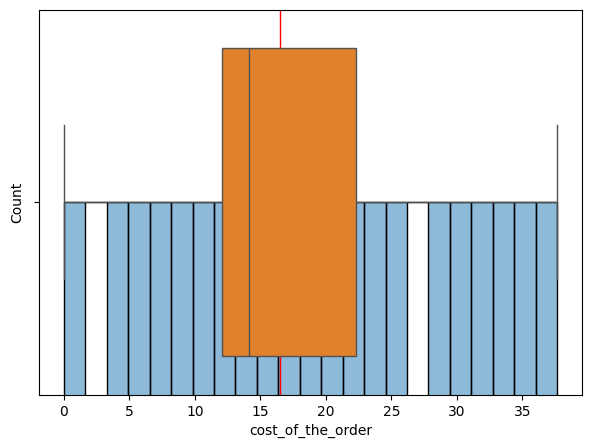

In [ ]:
plt.figure(figsize = (7,5))
plt.axvline(df['cost_of_the_order'].mean(), color='r', linewidth=1)
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)

sns.boxplot(data = df, x = 'cost_of_the_order')


average_cost = df['cost_of_the_order'].mean()
print(f'Average cost of an order: ${average_cost:.2f}')

#### Observations:
The Average Cost of Order is **$16.51**

The *average* FoodHub order cost is about **16 USD**. Whereas, the *majority* of the FoodHub order cost ranges from **11 - 13 USD**.

### • Number Of unique customers have placed orders

In [ ]:
unique_customers = df['customer_id'].nunique()
print(f'Number of unique customers: {unique_customers}')

df['customer_id'].value_counts().unique()

Number of unique customers: 1200


array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])


#### Observations:
* No Of unique customers is **1200**
* Among these customers there is an order count range of **1 - 13**.

### • Restaurant with highest number of orders

In [ ]:
#The restaurant has received the highest number of orders with numbers
restaurant_orders = df.groupby('restaurant_name')['order_id'].nunique().sort_values(ascending=False)
print("Restaurant with the highest number of orders:")
print(restaurant_orders.head(1))


Restaurant with the highest number of orders:
restaurant_name
Shake Shack    219
Name: order_id, dtype: int64


#### Observations:
Restaurant Shake Shack has received the highest number of orders: 219

# **2.	Customer Behavior**

### • The average rating given by customers?

In [ ]:
# Convert 'rating' column to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#Calculate the average rating, ignoring missing values
average_rating = df['rating'].mean()
print(f'Average rating given by customers: {average_rating:.2f}')

Average rating given by customers: 4.34


Average rating given by customers is 4.34

### •	How does the rating vary between weekdays and weekends

In [ ]:
weekday_ratings = df[(df['day_of_the_week'] == 'Weekday') & (df['rating'] != 'Not given')]['rating'].astype(float)
weekend_ratings = df[(df['day_of_the_week'] == 'Weekend') & (df['rating'] != 'Not given')]['rating'].astype(float)

avg_weekday_rating = weekday_ratings.mean()
avg_weekend_rating = weekend_ratings.mean()

print(f'Average weekday rating: {avg_weekday_rating:.2f}')
print(f'Average weekend rating: {avg_weekend_rating:.2f}')

Average weekday rating: 4.31
Average weekend rating: 4.36


Average **weekday** rating by Customer: 4.31

Average **weekend** rating by Customer: 4.36

### • Cuisine type is ordered the most?

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame and 'cuisine_type' and 'order_id' are your columns

# Get the count of orders for each cuisine type
cuisine_order_counts = df['cuisine_type'].value_counts().reset_index()
cuisine_order_counts.columns = ['Cuisine Type', 'Number of Orders']

# Create a Plotly bar plot
fig = px.bar(cuisine_order_counts,
             x='Cuisine Type',
             y='Number of Orders',
             labels={'x': 'Cuisine Type', 'y': 'Number of Orders'},
             title='Most Ordered Cuisine Types',
             hover_data={'Number of Orders': True})

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Cuisine Type',
    yaxis_title='Number of Orders',
    xaxis_tickangle=-45
)

# Show the interactive plot
fig.show()

# Print the most ordered cuisine type
cuisine_orders = df.groupby('cuisine_type')['order_id'].nunique().sort_values(ascending=False)
print("Most ordered cuisine type: ")
print(cuisine_orders.head(1))


Most ordered cuisine type: 
cuisine_type
American    585
Name: order_id, dtype: int64


**American** is the most ordered cuisine type :585

### • The distribution of orders across different days of the week

In [ ]:

# Create a DataFrame for the distribution of orders across different days of the week
order_distribution = df['day_of_the_week'].value_counts().reset_index()
order_distribution.columns = ['day_of_the_week', 'number_of_orders']

# Sort the days to follow the natural order of the week
order_distribution['day_of_the_week'] = pd.Categorical(order_distribution['day_of_the_week'],
                                                       categories=['Weekend', 'Weekday'],
                                                       ordered=True)
order_distribution = order_distribution.sort_values('day_of_the_week')

# Create the interactive bar plot using Plotly
fig = px.bar(order_distribution,
             x='day_of_the_week',
             y='number_of_orders',
             title='Distribution of Orders Across Different Days of the Week',
             labels={'day_of_the_week': 'Day of the Week', 'number_of_orders': 'Number of Orders'},
             hover_data={'number_of_orders': True})

# Show the plot
fig.show()


Number Order Placed On **Weekend** is ***Higher*** than **Weekday** : 1351 > 547

# **3.	Restaurant Performance**

### • The average food preparation time for each restaurant?

In [ ]:
avg_prep_time = df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values()
print(avg_prep_time)
"""
Only use When Need
avg_prep_time_per_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()
print(avg_prep_time_per_restaurant)

# Visualization
avg_prep_time_per_restaurant.plot(kind='bar', figsize=(15, 5), title='Average Food Preparation Time by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.show()"""

restaurant_name
Haru Gramercy Park        20.0
67 Burger                 20.0
Frank Restaurant          20.0
DespaÌ±a                  20.5
Sarabeth's West           21.0
                          ... 
Taro Sushi                35.0
Cipriani Le Specialita    35.0
Kambi Ramen House         35.0
Klong                     35.0
Sushi Choshi              35.0
Name: food_preparation_time, Length: 178, dtype: float64


"\nOnly use When Need\navg_prep_time_per_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()\nprint(avg_prep_time_per_restaurant)\n\n# Visualization\navg_prep_time_per_restaurant.plot(kind='bar', figsize=(15, 5), title='Average Food Preparation Time by Restaurant')\nplt.xlabel('Restaurant Name')\nplt.ylabel('Average Food Preparation Time (minutes)')\nplt.show()"

### • Resturant has the shortest average food preparation time

In [ ]:
# Calculate the average preparation time by restaurant name
avg_prep_time = df.groupby('restaurant_name')['food_preparation_time'].mean().reset_index()

# Sort the data by average preparation time in ascending order
avg_prep_time = avg_prep_time.sort_values(by='food_preparation_time')

# Find the top 5 restaurants with the shortest average preparation time
top_5_restaurants = avg_prep_time.head(5)
print("Top 5 Restaurants with the Shortest Average Preparation Time:")
for index, row in top_5_restaurants.iterrows():
    print(f"{row['restaurant_name']}: {row['food_preparation_time']:.2f} minutes")

# Create the bar chart
fig = px.bar(avg_prep_time, x='restaurant_name', y='food_preparation_time',
             title='Average Preparation Time by Restaurant',
             labels={'restaurant_name': 'Restaurant', 'food_preparation_time': 'Average Preparation Time'},
             hover_data={'food_preparation_time': ':.2f'})

# Update the layout for better visualization
fig.update_layout(xaxis_tickangle=-45)

# Show the figure
fig.show()

Top 5 Restaurants with the Shortest Average Preparation Time:
Haru Gramercy Park: 20.00 minutes
67 Burger: 20.00 minutes
Frank Restaurant: 20.00 minutes
DespaÌ±a: 20.50 minutes
Sarabeth's West: 21.00 minutes


Restaurants with the Shortest Average Preparation Time:

* Haru Gramercy Park: 20.00 minutes
* 67 Burger: 20.00 minutes
* Frank Restaurant: 20.00 minutes
* DespaÌ±a: 20.50 minutes
* Sarabeth's West: 21.00 minutes

### • The average delivery time compare across different restaurants?

In [ ]:

# Calculate the average delivery time by restaurant name
avg_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index().sort_values(by='delivery_time')

# Print the average delivery time for each restaurant
print("Average Delivery Time by Restaurant:")
print(avg_delivery_time)

# Create the bar chart
fig = px.bar(avg_delivery_time, x='restaurant_name', y='delivery_time',
             title='Average Delivery Time by Restaurant',
             labels={'restaurant_name': 'Restaurant', 'delivery_time': 'Average Delivery Time (minutes)'},
             hover_data={'delivery_time': ':.2f'})

# Update the layout for better visualization
fig.update_layout(xaxis_tickangle=-45)

# Show the figure
fig.show()


Average Delivery Time by Restaurant:
        restaurant_name  delivery_time
60    Gaia Italian Cafe           15.0
110      Paul & Jimmy's           15.0
152      The MasalaWala           15.0
71               Hibino           15.0
40       Coppola's East           16.0
..                  ...            ...
64               Haandi           30.5
58     Frank Restaurant           31.0
148          Taro Sushi           32.0
68   Haru Gramercy Park           32.0
132     Sarabeth's West           33.0

[178 rows x 2 columns]


### • Checking is there a correlation between the cost of the order and the rating given

In [ ]:
# Calculate the correlation between cost and rating
correlation = df[['cost_of_the_order', 'rating']].corr().iloc[0, 1]
print(f'Correlation between cost of the order and the rating given: {correlation:.2f}')

# Create a scatter plot with a trendline
fig = px.scatter(df, x='cost_of_the_order', y='rating', trendline='ols',
                 title=f'Correlation Between Cost of Order and Rating (Correlation: {correlation:.2f})',
                 labels={'cost': 'Cost of Order', 'rating': 'Rating'})

# Show the figure
fig.show()


Correlation between cost of the order and the rating given: 0.03


# **4.	Demand Patterns**

### •	Howing the demand for different cuisine types vary on weekdays versus weekends?

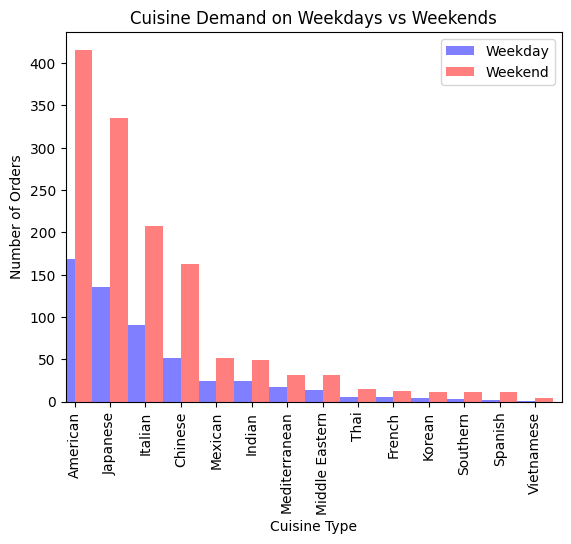

In [ ]:
cuisine_demand_weekday = df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts()
cuisine_demand_weekend = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

"""print("Cuisine demand on weekdays:")
print(cuisine_demand_weekday)
print("\nCuisine demand on weekends:")
print(cuisine_demand_weekend)"""

# Visualization
cuisine_demand_weekday.plot(kind='bar', alpha=0.5, color='blue', position=1, label='Weekday')
cuisine_demand_weekend.plot(kind='bar', alpha=0.5, color='red', position=0, label='Weekend')
plt.legend()
plt.title('Cuisine Demand on Weekdays vs Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

### •	Which day of the week has the highest average order cost?

In [ ]:
avg_cost_per_day = df.groupby('day_of_the_week')['cost_of_the_order'].mean()
highest_avg_cost_day = avg_cost_per_day.idxmax()
highest_avg_cost = avg_cost_per_day.max()
print(f'Day with the highest average order cost: {highest_avg_cost_day} (${highest_avg_cost:.2f})')

Day with the highest average order cost: Weekend ($16.58)


### •	What is the most common day for orders to be placed?

In [ ]:
most_common_order_day = df['day_of_the_week'].value_counts().idxmax()
print(f'Most common day for orders: {most_common_order_day}')

Most common day for orders: Weekend


### •	How does the average rating vary by cuisine type?

cuisine_type
American          4.300813
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.404255
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64


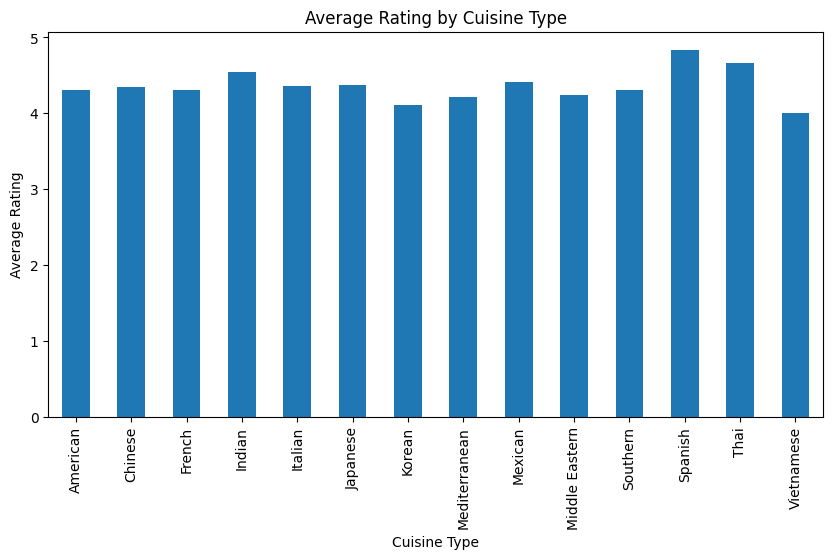

In [ ]:
avg_rating_per_cuisine = df[df['rating'] != 'Not given'].groupby('cuisine_type')['rating'].mean()
print(avg_rating_per_cuisine)

# Visualization
avg_rating_per_cuisine.plot(kind='bar', figsize=(10, 5), title='Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.show()

# **5.	Operational Efficiency**

### •	Average Delivery Time for All Orders

In [ ]:
average_delivery_time = df['delivery_time'].mean()
print(f'Average delivery time for all orders: {average_delivery_time:.2f} minutes')

Average delivery time for all orders: 24.16 minutes


### •	Restaurant with Longest Average Delivery Time

In [ ]:
# Calculate average delivery time per restaurant
avg_delivery_time_per_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()

# Now you can proceed with the rest of your code
longest_delivery_time_restaurant = avg_delivery_time_per_restaurant.idxmax()
longest_delivery_time = avg_delivery_time_per_restaurant.max()
print(f'Restaurant with the longest average delivery time: {longest_delivery_time_restaurant} ({longest_delivery_time:.2f} minutes)')

Restaurant with the longest average delivery time: Sarabeth's West (33.00 minutes)


### •	Relationship Between Food Preparation Time and Delivery Time

Relationship between food preparation time and delivery time: 0.01
Relationship between food preparation time and delivery time: 0.01


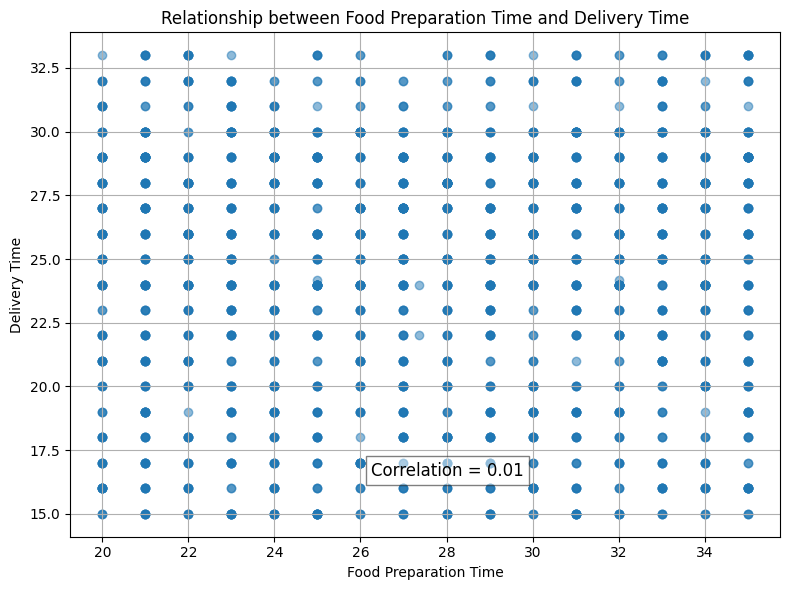

In [ ]:
prep_delivery_correlation = df[['food_preparation_time', 'delivery_time']].corr().iloc[0, 1]
print(f'Relationship between food preparation time and delivery time: {prep_delivery_correlation:.2f}')

# Compute correlation
prep_delivery_correlation = df[['food_preparation_time', 'delivery_time']].corr().iloc[0, 1]

# Print correlation
print(f'Relationship between food preparation time and delivery time: {prep_delivery_correlation:.2f}')

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['food_preparation_time'], df['delivery_time'], alpha=0.5)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Delivery Time')
plt.grid(True)
plt.tight_layout()

# Optionally, show correlation coefficient on the plot
plt.text(df['food_preparation_time'].max() * 0.75, df['delivery_time'].min() * 1.1,
         f'Correlation = {prep_delivery_correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


#delivery time and food prepration - to mean

Relationship between food preparation time and delivery time: 0.01


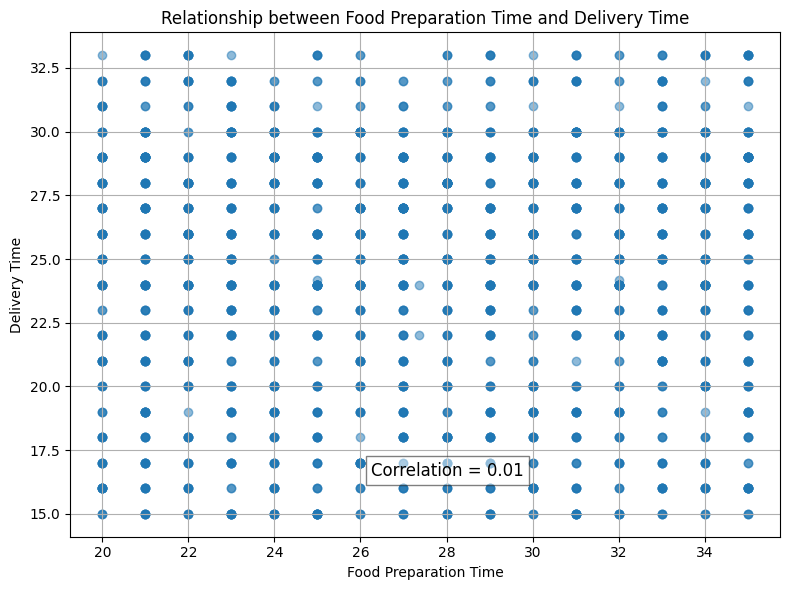

In [ ]:

# Compute correlation
prep_delivery_correlation = df[['food_preparation_time', 'delivery_time']].corr().iloc[0, 1]

# Print correlation
print(f'Relationship between food preparation time and delivery time: {prep_delivery_correlation:.2f}')

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['food_preparation_time'], df['delivery_time'], alpha=0.5)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Delivery Time')
plt.grid(True)
plt.tight_layout()

# Optionally, show correlation coefficient on the plot
plt.text(df['food_preparation_time'].max() * 0.75, df['delivery_time'].min() * 1.1,
         f'Correlation = {prep_delivery_correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()



day_of_the_week
Weekday    28.340334
Weekend    22.470883
Name: delivery_time, dtype: float64

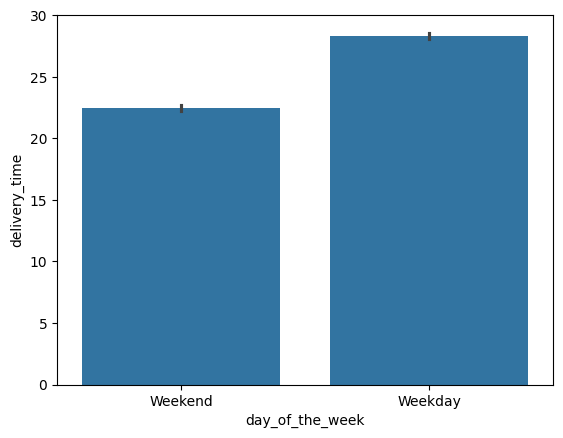

In [ ]:
sns.barplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
df.groupby(['day_of_the_week'])['delivery_time'].mean()


#### Observations:
On average delivery times are higher during the weekday than on the weekend.
1. Weekday - 28 minutes
2. Weekend - 22 minutes

### •	Impact of Delivery Time on Customer Ratings

<Figure size 1000x800 with 0 Axes>

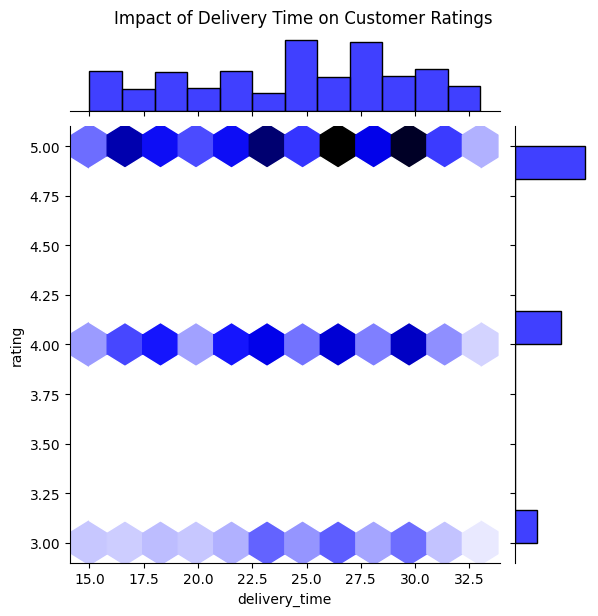

In [ ]:
"""plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='delivery_time', y='rating', kind='reg')
plt.suptitle('Impact of Delivery Time on Customer Ratings', y=1.02)
plt.show()"""
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='delivery_time', y='rating', kind='hex', color='b')
plt.suptitle('Impact of Delivery Time on Customer Ratings', y=1.02)
plt.show()


# **6.	Customer Insights**

### •	Repeat Order Rate

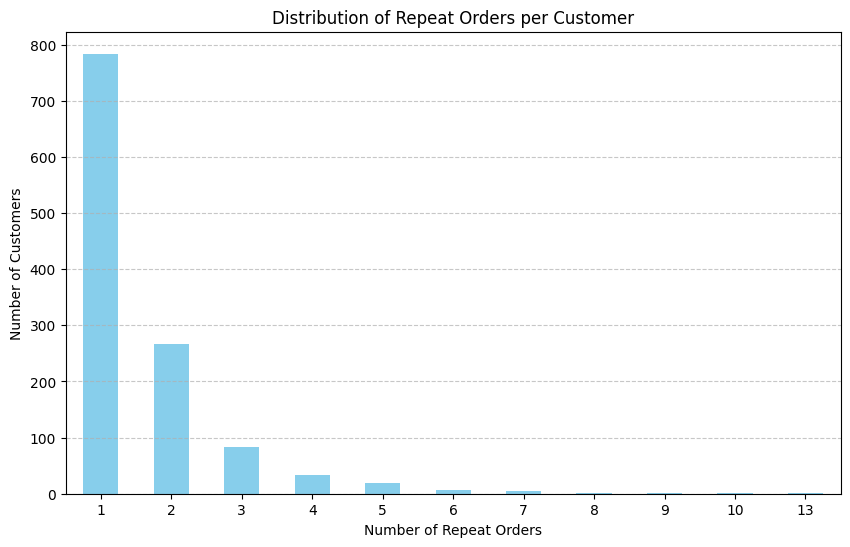

In [ ]:
import matplotlib.pyplot as plt

# Calculate repeat customer counts
repeat_customers = df['customer_id'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
repeat_customers.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Repeat Orders per Customer')
plt.xlabel('Number of Repeat Orders')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Top 5 Customers by customer_id:
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


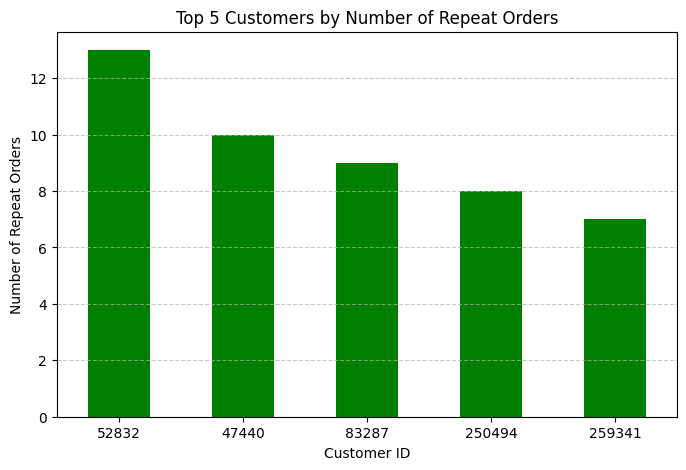

In [ ]:
# Get top 5 customers by customer_id
top_5_customers = repeat_customers.head(5)

# Displaying customer_id of the top 5
print("Top 5 Customers by customer_id:")
print(top_5_customers)

# Optionally, visualize the top 5 customers
plt.figure(figsize=(8, 5))
top_5_customers.plot(kind='bar', color='green')
plt.title('Top 5 Customers by Number of Repeat Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Repeat Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### •	Percentage of Orders Receiving a Rating of 4 or Higher

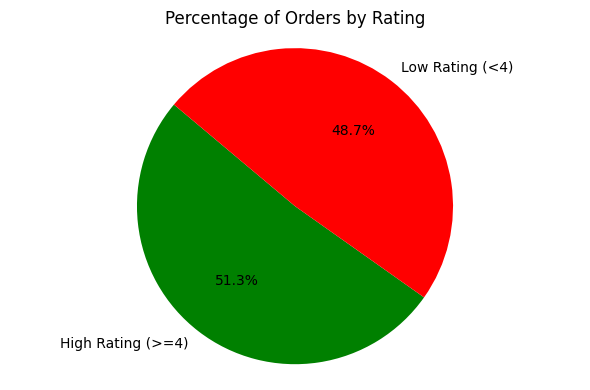

Percentage of orders receiving a rating of 4 or higher: 51.32%


In [ ]:
import seaborn as sns

# Calculate high rating percentage
high_rating_percentage = (df['rating'] >= 4).mean()

# Create a pie chart
plt.figure(figsize=(6, 4))
labels = ['High Rating (>=4)', 'Low Rating (<4)']
sizes = [high_rating_percentage, 1 - high_rating_percentage]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Orders by Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

high_rating_percentage = (df['rating'] >= 4).mean()
print(f'Percentage of orders receiving a rating of 4 or higher: {high_rating_percentage:.2%}')

#### Observations:
Percentage of orders receiving a rating of 4 or higher: 51.32%

# **Conclusion**


*  Interestingly, even though our weekends are busier, our delivery times are quicker compared to weekdays—talk about efficiency!
*  However, we've noticed that a good chunk of our orders (38%) aren't rated. We're keen to hear from you so we can keep improving.
* Only three standout restaurants have received over 100 orders, and the crowd favorites are clear: American, Japanese, Italian, and Chinese cuisines are the top picks among our customers.
* At Foodhub, weekends are bustling with activity, as that's when most of our orders come through. While many customers place just a single order, we've got one loyal fan who has ordered an impressive numbers.


---



The analysis provides valuable insights into customer behavior, restaurant performance, and operational efficiency. Recommendations for the company based on these insights might include:

1. Enhancing Customer Experience: Focus on improving delivery times, especially for restaurants with longer delivery durations.

2. Promotional Strategies: Implement targeted promotions on days with lower average orders to balance demand.

3. Cuisine Offering: Increase the availability of popular cuisine types, particularly on weekends when demand is higher.

4. Rating Improvement: Address factors leading to lower ratings, such as long delivery times or high costs, to improve overall customer satisfaction.




---




## **Business Implications**
1. Operational Efficiency:
By understanding outliers in preparation and delivery times, restaurants can investigate and address potential inefficiencies or exceptional cases that cause delays.
Standardizing preparation and delivery processes could reduce variability and improve customer satisfaction.

2. Menu Optimization:
Analysis of 'cuisine_type' and associated preparation times can guide menu adjustments. For instance, if certain cuisines consistently take longer to prepare, restaurants might streamline those processes or adjust menu offerings to balance preparation times.
3. Customer Experience:Filling missing values and ensuring data accuracy allows for better prediction models, which can improve customer experience through more accurate delivery time estimates and personalized service

4. Strategic Decisions:The insights gained from clean and processed data support strategic decision-making, such as identifying popular dishes, peak order times, and areas for improvement in service delivery.

This foundational work is essential for any subsequent steps in data analysis or machine learning, enabling more accurate and actionable insights for improving restaurant operations and customer satisfaction.